<a href="https://colab.research.google.com/github/uygararas/ie423/blob/main/task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

#**Jupyter Notebook created by Uygar Aras for Task 7 of IE 423 Course**


---



In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/black_friday/train.csv', encoding = "ISO-8859-1")

Mounted at /content/drive


In [2]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Dropping rows with NaN values in Product_Category_1 columns for simplicity
df.dropna(subset=['Product_Category_1'], inplace=True)

In [4]:
# Extract relevant columns for market basket analysis
basket_data = df[['User_ID', 'Product_ID']]

In [5]:
# Transform the data into a matrix format
basket_matrix = basket_data.groupby(['User_ID', 'Product_ID'])['Product_ID'].count().unstack().reset_index().fillna(0).set_index('User_ID')
basket_matrix = basket_matrix.applymap(lambda x: 1 if x > 0 else 0)

basket_matrix.head()

Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0098942,P0099042,P0099142,P0099242,P0099342,P0099442,P0099642,P0099742,P0099842,P0099942
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Create a transaction encoder
te = TransactionEncoder()
te_ary = te.fit(basket_data['Product_ID'].tolist()).transform(basket_data['Product_ID'].tolist())
basket_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets using the encoded data
min_support = 0.01
frequent_itemsets = apriori(basket_encoded, min_support=min_support, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the frequent itemsets and rules
frequent_itemsets.head(), rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(    support itemsets
 0  1.000000      (0)
 1  0.519652      (1)
 2  0.995399      (2)
 3  0.353807      (3)
 4  0.997086      (4),
   antecedents consequents  antecedent support  consequent support   support  \
 0         (0)         (1)            1.000000            0.519652  0.519652   
 1         (1)         (0)            0.519652            1.000000  0.519652   
 2         (0)         (2)            1.000000            0.995399  0.995399   
 3         (2)         (0)            0.995399            1.000000  0.995399   
 4         (0)         (3)            1.000000            0.353807  0.353807   
 
    confidence  lift  leverage  conviction  zhangs_metric  
 0    0.519652   1.0       0.0         1.0            0.0  
 1    1.000000   1.0       0.0         inf            0.0  
 2    0.995399   1.0       0.0         1.0            0.0  
 3    1.000000   1.0       0.0         inf            0.0  
 4    0.353807   1.0       0.0         1.0            0.0  )

In [10]:
# Display the top 10 frequent itemsets with the highest support
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,1.000000,(0)
20,1.000000,"(0, P)"
10,1.000000,(P)
14,0.997086,"(0, 4)"
50,0.997086,"(P, 4)"
95,0.997086,"(0, P, 4)"
4,0.997086,(4)
37,0.995399,"(P, 2)"
12,0.995399,"(0, 2)"
2,0.995399,(2)


In [11]:
# Display the top 10 association rules with the highest confidence
rules.sort_values(by='confidence', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4766,"(0, 7, 2, 6, P, 3)",(4),0.010579,0.997086,0.010579,1.0,1.002923,0.000031,inf,0.002945
4767,"(0, 7, 2, 6, 3, 4)",(P),0.010579,1.000000,0.010579,1.0,1.000000,0.000000,inf,0.000000
4755,"(9, 5, 3)","(0, P, 4, 2)",0.013227,0.993972,0.013227,1.0,1.006065,0.000080,inf,0.006109
4744,"(2, 3, 5, 4, 9)","(0, P)",0.013227,1.000000,0.013227,1.0,1.000000,0.000000,inf,0.000000
4745,"(P, 3, 5, 4, 9)","(0, 2)",0.013227,0.995399,0.013227,1.0,1.004623,0.000061,inf,0.004663
4747,"(9, 0, 5, 3)","(P, 4, 2)",0.013227,0.993972,0.013227,1.0,1.006065,0.000080,inf,0.006109
4748,"(9, 5, 3, 2)","(0, P, 4)",0.013227,0.997086,0.013227,1.0,1.002923,0.000039,inf,0.002953
4749,"(9, P, 5, 3)","(0, 4, 2)",0.013227,0.993972,0.013227,1.0,1.006065,0.000080,inf,0.006109
4750,"(9, 5, 4, 3)","(0, P, 2)",0.013227,0.995399,0.013227,1.0,1.004623,0.000061,inf,0.004663
4736,"(0, 2, P, 3, 5, 9)",(4),0.013227,0.997086,0.013227,1.0,1.002923,0.000039,inf,0.002953


In [12]:
# Filter rules with confidence greater than 0.7 and lift greater than 1
filtered_rules = rules[(rules['confidence'] > 0.7) & (rules['lift'] > 1)]
filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
21,(1),(2),0.519652,0.995399,0.518018,0.996855,1.001463,0.000757,1.463003,0.003041
23,(1),(4),0.519652,0.997086,0.519652,1.000000,1.002923,0.001514,inf,0.006067
26,(4),(2),0.997086,0.995399,0.993972,0.996877,1.001485,0.001474,1.473219,0.508759
27,(2),(4),0.995399,0.997086,0.993972,0.998566,1.001485,0.001474,2.032642,0.322221
28,(9),(2),0.252480,0.995399,0.252480,1.000000,1.004623,0.001162,inf,0.006155
...,...,...,...,...,...,...,...,...,...,...
4785,"(0, 7, 8, 3, 4)","(P, 2)",0.010333,0.995399,0.010333,1.000000,1.004623,0.000048,inf,0.004649
4786,"(2, 7, 8, P, 3)","(0, 4)",0.010333,0.997086,0.010333,1.000000,1.002923,0.000030,inf,0.002945
4788,"(7, 8, P, 3, 4)","(0, 2)",0.010333,0.995399,0.010333,1.000000,1.004623,0.000048,inf,0.004649
4789,"(3, 2, 7, 8)","(0, P, 4)",0.010333,0.997086,0.010333,1.000000,1.002923,0.000030,inf,0.002945


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


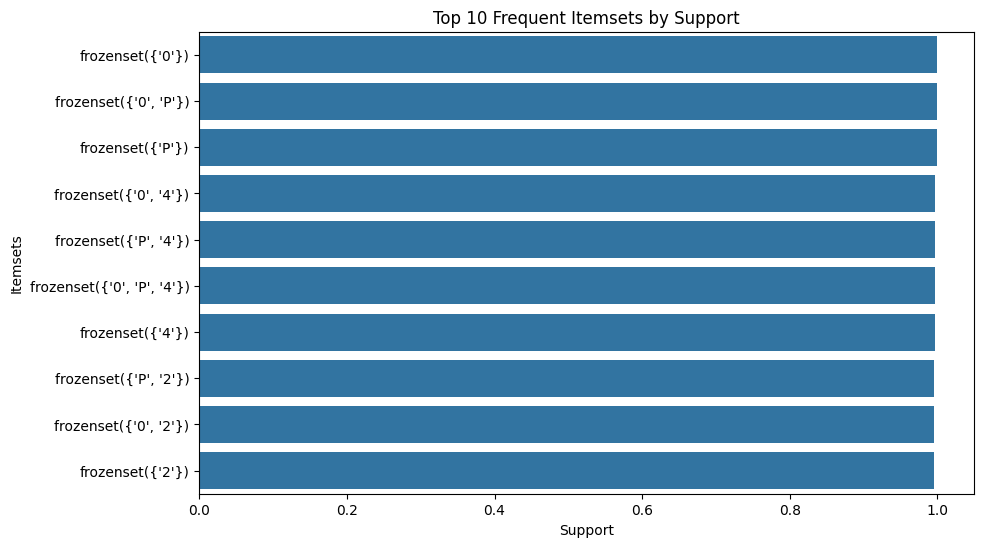

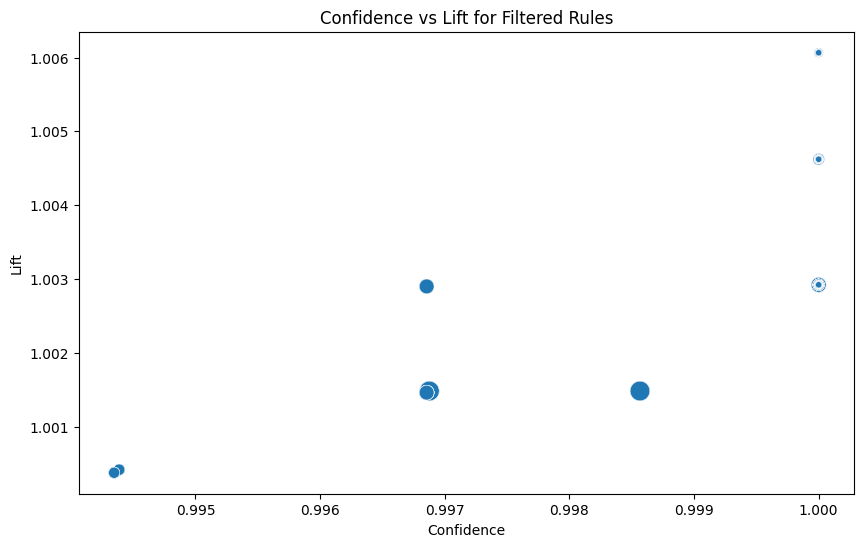

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the support of the top 10 frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets.sort_values(by='support', ascending=False).head(10))
plt.title('Top 10 Frequent Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# Plotting the confidence vs lift for the filtered rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='confidence', y='lift', size='support', data=filtered_rules, legend=False, sizes=(20, 200))
plt.title('Confidence vs Lift for Filtered Rules')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()